# Medical MNIST dataset

The *Medical MNIST dataset* has been selected for this project. This dataset contains 6 classes of medical images, and each class has approximately 10k samples. All the images are in the size of 64 by 64. 

**Data Exploration - Reading the dataset and extracting features**

Each folder in the archive directory contains sample images in each class. So, the name of folders are considered as *Label Names* and the number of images in each class (folder) is reported. Also, some examples of the dataset have been showed.

All images (after converting from bgr to grayscale) have the shape of [64,64,1]. So, totaly, each data sample (image) has 64 × 64 × 1 = 4096 features.


In [13]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

No. of Samples (images) in Class  AbdomenCT =  10000
No. of Samples (images) in Class  BreastMRI =  8954
No. of Samples (images) in Class  ChestCT =  10000
No. of Samples (images) in Class  CXR =  10000
No. of Samples (images) in Class  Hand =  10000
No. of Samples (images) in Class  HeadCT =  10000
Total Data Samples (number of images):  58954
Number of features in each sample =  4096


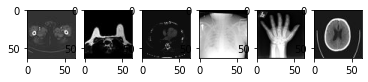

In [14]:
k=0;           # counter for data samples
Dataset = [];  # the dataset that will be used in classical models (non deep)
imgdb = [];    # the dataset that will be used in Neural Network models (fully-connected and CNN)
Label = [];    # Label of images = folder name
fig = plt.figure()
im_counter=1;
for dir1 in os.listdir('archive'):
  class_counter=0;
  for file in os.listdir(os.path.join('archive', dir1)):
    image_path= os.path.join('archive', dir1,  file)
    im =np.asarray(Image.open(image_path))

    V = np.reshape(im, (1,np.size(im)));
    Dataset.append(V[0])                # appending feature vector of current image to the Dataset (for non deeps)
    imgdb.append(im)                    # appending feature vector of current image to the imgdb (for NNs)
    Label.append(dir1)                  # appending the folder name as the label of the current image
    k = k+1;
    class_counter = class_counter + 1
  # show examples of images
  ax = fig.add_subplot(1, 6, im_counter)
  im_counter = im_counter + 1
  imgplot = plt.imshow(im, cmap='gray')
  print("No. of Samples (images) in Class ", dir1, "= " , class_counter)
print("Total Data Samples (number of images): ", k)
print("Number of features in each sample = ", len(V[0]))


**Training Classical Models: Naive Bayes - K Nearest Neighbors - Decision tree**

Three different classical ML models have been selected for medical image classification: Naiive Bayes which is a fast probablistic model, Decision Tree, and Logisitc Regression. 

K Nearest neighbors also may provide high accuracy, but it's not practical as the dataset is large and prediciting will be very slow. So, it has not selected. 

Support vector machine (SVM) is another interesting alternative. But, as we will use different neural networks in next parts, I tried to choose simple algorithms and check their prformance against advanced models. 


First we split the dataset into training (70%) and test (30%) subsets (holdout method). k-fold cross validation strategy has not choosen, because the dataset is large enough, and 30% of that is about 30,000 samples which has a good diversity for evaluation. Also, holdout method is far faster than k-fold cross validation. 

Then we train three mentioned ML models based on training subset, and then provide the labels for both training and test subsets. 

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.linear_model import LogisticRegression

In [16]:
# split dataset
X_train, X_test, y_train, y_test = train_test_split(Dataset, Label, test_size=0.3, random_state=0)

# 1 - Naive Bayes
gnb = GaussianNB();
model_gnb = gnb.fit(X_train, y_train)
y_predict_gnb = model_gnb.predict(X_test)
y_predict_gnb_training = model_gnb.predict(X_train)

In [17]:
# 2 - Decision Tree
tr = tree.DecisionTreeClassifier()
model_tree = tr.fit(X_train, y_train)
y_predict_tree = model_tree.predict(X_test)
y_predict_tree_training = model_tree.predict(X_train)

In [18]:
# 3 - Logistic Regression
lr = LogisticRegression(random_state=0)
model_lr = lr.fit(X_train, y_train)
y_predict_lr = model_lr.predict(X_test)
y_predict_lr_training = model_lr.predict(X_train)

C:\Users\Farimah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Evaluation of classical models**

Using previous provided labels for training and test samples, in this section, the evaluation criteria for the results have been calculated and reported. 

For all the three models, the values of Accuracy, Precision, Recall, and F-score, have been calculated for both training and test subsets. Also, the confusion matrix for test subsets is reported for all models. It is quite a balanced dataset, so we can use accuracy as metric. However, having multiple metrics is always handy.

There is a bit of overfitting as training accuracy is higher than test accuracy. The accuracy for all models is higher that 0.97, and there is a little difference between training and test results. 

The best model among these three models is Decision Tree with the acc. of 0.9938

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

# 1: Naiive Bayes results:
print("Naiive Bayes Results: ")
print("confusion Matrix: ")
print(confusion_matrix(y_test, y_predict_gnb))
acc_gnb = (y_test == y_predict_gnb).sum() / len(y_test)
gnb_res = precision_recall_fscore_support(y_test, y_predict_gnb, average='weighted')
print(">> Test Set:")
print("Accuracy = ", acc_gnb, "   Precision = " , gnb_res[0], "  Recall = ", gnb_res[1], "  F-Score = ", gnb_res[2])
print(">> Training Set:")
acc_gnb_training = (y_train == y_predict_gnb_training).sum() / len(y_train)
gnb_res_training = precision_recall_fscore_support(y_train, y_predict_gnb_training, average='weighted')
print("Accuracy = ", acc_gnb_training, "   Precision = " , gnb_res_training[0], "  Recall = ", gnb_res_training[1], "  F-Score = ", gnb_res_training[2])
print('----------------------------------------------------------------------------')

# 2: Logistic Regression results:
print("Logistic Regression Results: ")
print("confusion Matrix: ")
print(confusion_matrix(y_test, y_predict_lr))
acc_lr = (y_test == y_predict_lr).sum() / len(y_test)
lr_res = precision_recall_fscore_support(y_test, y_predict_lr, average='weighted')
print(">> Test Set:")
print("Accuracy = ", acc_lr, "   Precision = " , lr_res[0], "  Recall = ", lr_res[1], "  F-Score = ", lr_res[2])
print(">> Training Set:")
acc_lr_training = (y_train == y_predict_lr_training).sum() / len(y_train)
lr_res_training = precision_recall_fscore_support(y_train, y_predict_lr_training, average='weighted')
print("Accuracy = ", acc_lr_training, "   Precision = " , lr_res_training[0], "  Recall = ", lr_res_training[1], "  F-Score = ", lr_res_training[2])
print('----------------------------------------------------------------------------')

# 3: Tree Results
print("Decision Tree Results: ")
print("confusion Matrix: ")
print(confusion_matrix(y_test, y_predict_tree))
accuracy = (y_test == y_predict_tree).sum() / len(y_test)
tree_res = precision_recall_fscore_support(y_test, y_predict_tree, average='weighted')
print(">> Test Set:")
print("Accuracy = ", accuracy, "   Precision = " , tree_res[0], "  Recall = ", tree_res[1], "  F-Score = ", tree_res[2])
print(">> Training Set:")
acc_tree_training = (y_train == y_predict_tree_training).sum() / len(y_train)
tree_res_training = precision_recall_fscore_support(y_train, y_predict_tree_training, average='weighted')
print("Accuracy = ", acc_tree_training, "   Precision = " , tree_res_training[0], "  Recall = ", tree_res_training[1], "  F-Score = ", tree_res_training[2])


Naiive Bayes Results: 
confusion Matrix: 
[[2968    0   24    0    2    0]
 [   0 2626    0    0   43    0]
 [   0    0 2963    0   44    0]
 [   0    0   35 2946    0    0]
 [   0    0  131    0 2893    0]
 [   0    0    0    0  101 2911]]
>> Test Set:
Accuracy =  0.9785152937185504    Precision =  0.9792182981258163   Recall =  0.9785152937185504   F-Score =  0.9786921401795132
>> Training Set:
Accuracy =  0.9807836770300724    Precision =  0.9813026086373493   Recall =  0.9807836770300724   F-Score =  0.9809157985963062
----------------------------------------------------------------------------
Logistic Regression Results: 
confusion Matrix: 
[[2985    0    0    9    0    0]
 [   0 2669    0    0    0    0]
 [   3    1 2975    5   17    6]
 [   5    0    0 2976    0    0]
 [  12    0   23    5 2919   65]
 [  15    0    5   42   40 2910]]
>> Test Set:
Accuracy =  0.9856957087126138    Precision =  0.985680528044664   Recall =  0.9856957087126138   F-Score =  0.9856553897450294
>> Tr

**Preparing Dataset for Neural Networks**

The labels in Keras should be in the Categorical type. But our labels are in the string type. So, in this section, we first turn string values of the labels into numbers, and then turn the numbers into categorical using *to_categorical* function. 

Also, we use the real shape of inputs (i.e. 64 × 64 × 1) in this section and next one.

All the input images are converted from uint8 into float32 type, and normalized between 0 and 1 values. 

The batch size for both neural networks is set to 256 which is large enaugh to train faster, and small enaugh for preventing the out-of-memory problem. 

In [20]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# turn string values to numbers 0-5
Numerical_Label = [];
for i in range(len(Label)):
  if Label[i]=='AbdomenCT':
    Numerical_Label.append(0);
  elif Label[i]=='BreastMRI':
    Numerical_Label.append(1);
  elif Label[i]=='CXR':
    Numerical_Label.append(2);
  elif Label[i]=='ChestCT':
    Numerical_Label.append(3);
  elif Label[i]=='Hand':
    Numerical_Label.append(4);
  elif Label[i]=='HeadCT':
    Numerical_Label.append(5);

# turn numbers into categorical:
Numerical_Label = np.array(Numerical_Label)
imgdb = np.array(imgdb)
output_matrix = to_categorical((Numerical_Label))
num_classes = 6
input_shape = (64, 64, 1)

# the data, split between train (70%) and test sets (30%)
X_train, X_test, y_train, y_test = train_test_split(imgdb, output_matrix, test_size=0.3, random_state=0)

# Normalization and unit8 to float32 conversion
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

batch_size = 256

**Fully-Connected Neural Network**
 
I tested some networks, and finally the best setting achieved as follows:
- 2 hidden layers, each 10 neurons
- all activation functions = 'ReLu'
- Learning rate = 0.0001
- optimizer = Adam

It's a small model so it does not overfit quickly. Adam uses momentum and adaptive learning to learn faster.

Other settings (like using tanh and sigmoid activations, or using stochastic gradient descent optimizer, or bigger learning rates) caused bigger loss in the model. Also smaller learning rates make training slower and needing more epochs for training. 

The results clearly shows that, this architecture could completely learn the problem, as training accuracy is very close to 100%.

Also, The accuracy for test subset is bigger than decision tree result. So, The FCNN is better than classical models. 

In [21]:
model = keras.Sequential(
    [
        layers.Flatten(input_shape=input_shape),
        layers.Dense(10, activation='relu'),
        layers.Dense(10, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ]
)
model.summary()
epochs = 100
model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=1e-4), metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs)
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 10)                40970     
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 6)                 66        
                                                                 
Total params: 41,146
Trainable params: 41,146
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
162/162 [==============================] - 3s 12ms/step - loss: 1.2667 - accuracy: 0.4669
Epoch 2/100
162/162 [==============================] - 2s 11ms/step - loss: 0.7538

**Convolutional Neural Network**

I tried to create a CNN model very similar to FCNN model. So, the number of parameters for this model is very close to FCNN (FCNN = 41146 , CNN = 41....)

Also, it has 2 convolutional layers with relu activation, and in the last layer I have used a softmax layer to classify more than 2 classes.

Other settings, like learning rate, optimizer, mini batch size, etc are similar to previous model. 

The results clearly shows that CNN is the best model among all the examined models. 

In [22]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(31, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
model.summary()

epochs = 30
model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=1e-4), metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs)
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 31)        4495      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 31)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6076)              0         
                                                                 
 dense_3 (Dense)             (None, 6)                

# Conclusion
The artificial neural network and convolutional network both perform better than the baseline models. In this simple training cnn models (with acc= 0.9980)prforms slightly better than fully-connected neuram network (with acc=0.9966). However, I think the CNN is better suited for this dataset as it learns features from the images.
